In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Loading amazon uk price prediction dataset
amazon_prd_df = pd.read_csv("/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/5. WEEK 5/LABs WEEK 5/DAY 1/amz_uk_price_prediction_dataset.csv")

In [3]:
# Display the first few rows of the dataset
amazon_prd_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
#Part 1: Understanding Product Categories

#Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

    #1. Frequency Tables:
     #   Generate a frequency table for the product category.

frequency_table = amazon_prd_df['category'].value_counts()
frequency_table


Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: category, Length: 296, dtype: int64

In [10]:

     #   Which are the top 5 most listed product categories?

top_5 = frequency_table.nlargest(5)
top_5

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

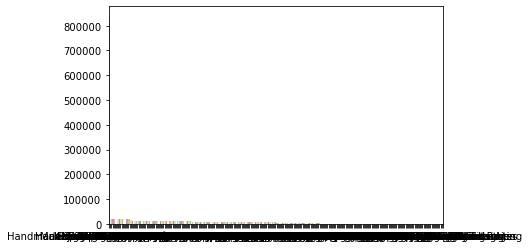

In [15]:

#2. Visualizations:

#    Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");



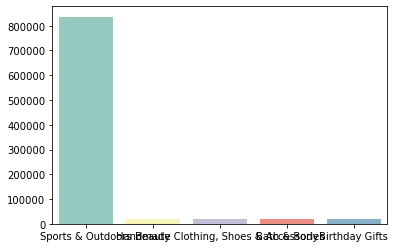

In [14]:
sns.barplot(x=top_5.index, y=top_5.values, palette="Set3");

([<matplotlib.patches.Wedge at 0x7fd7c56d6ac0>,
 [Text(1.095989795320367, 0.09384225356213624, 'Sports & Outdoors'),
  Text(-1.0931356237794014, 0.12269681342406162, 'Beauty'),
  Text(-1.099760665028727, -0.02294514448793374, 'Handmade Clothing, Shoes & Accessories'),
  Text(-1.0871937777390317, -0.16736095615624738, 'Bath & Body'),
  Text(-1.0560121991530333, -0.3079581712505356, 'Birthday Gifts')],
 [Text(0.597812615629291, 0.05118668376116522, '91.6%'),
  Text(-0.5962557947887643, 0.06692553459494269, '2.1%'),
  Text(-0.5998694536520328, -0.012515533357054765, '2.1%'),
  Text(-0.5930147878576536, -0.09128779426704402, '2.1%'),
  Text(-0.5760066540834727, -0.16797718431847394, '2.1%')])

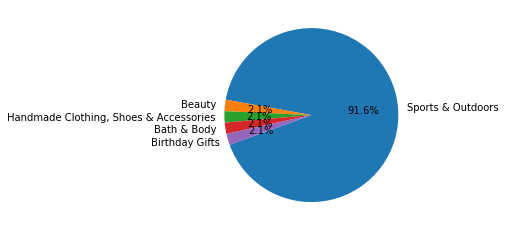

In [26]:
#    For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%', startangle=200)

In [ ]:
# Sports & Outdoors domine with a 91,6%

In [27]:
# Part 2: Delving into Product Pricing

# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

    #1. Measures of Centrality:
        # Calculate the mean, median, and mode for the price of products.

mean_price = amazon_prd_df['price'].mean()
median_price = amazon_prd_df['price'].median()
mode_price = amazon_prd_df['price'].mode()[0]

mean_price, median_price, mode_price
       

(89.24380943985244, 19.09, 9.99)

In [ ]:
#  What's the average price point of products listed? How does this compare with the most common price point (mode)?

# -- The average price is aprox. 89,24 and if we compare it with the common price (mode) we can observe a great diference with this value 9,99 

In [31]:

    #2. Measures of Dispersion:
        # Determine the variance, standard deviation, range, 
variance_price = amazon_prd_df['price'].var()
std_dev_price = amazon_prd_df['price'].std()
min_price = amazon_prd_df['price'].min()
max_price = amazon_prd_df['price'].max()
range_price = max_price - min_price

variance_price, std_dev_price, range_price

(119445.48532256528, 345.60886175352226, 100000.0)

In [34]:
# and interquartile range for product price.

quantiles_price25 = amazon_prd_df['price'].quantile(0.25)
quantiles_price75 = amazon_prd_df['price'].quantile(0.75)
interquartile = quantiles_price75 - quantiles_price25

interquartile

36.0

In [ ]:
 # How varied are the product prices? Are there any indicators of a significant spread in prices?

# If we observe the range of prices we can see a great variation between maximum values and minimum. If we observe variance and standard deviation we can see that exist a great dispersion in relation to the mean
# Most prices are within a relatively narrow range around the median, which is consistent with low price variability in this range. 

<AxesSubplot:xlabel='price', ylabel='Count'>

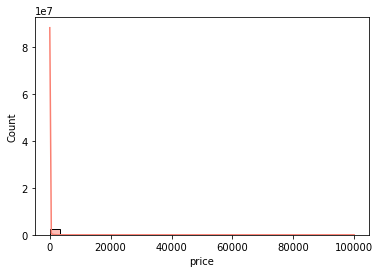

In [35]:
# 3. Visualizations:
     # Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
     #If its hard to read these diagrams, think why this is, and explain how it could be solved.
sns.histplot(amazon_prd_df['price'], kde=True, bins=30, color="salmon")

In [44]:
# The high variability of the prices as a continuous variable causes a significant difference between them and therefore the difficulty in interpreting the diagram
# To try to make a clearer interpretation of the results of the graph, we can use the discretization of the values. 

# Discretizing 'SalePrice' into 4 categories
bins = [0, 10000, 20000, 30000, amazon_prd_df['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
amazon_prd_df['Price_category'] = pd.cut(amazon_prd_df['price'], bins=bins, labels=labels, include_lowest=True)

amazon_prd_df.Price_category.value_counts()

Low          2443484
Medium           154
High              11
Very High          2
Name: Price_category, dtype: int64

<AxesSubplot:>

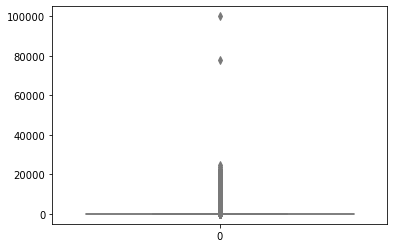

In [46]:
     # Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

sns.boxplot(data = amazon_prd_df['price'], color="lightblue")

In [48]:
# Part 3: Unpacking Product Ratings

#Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

    #1. Measures of Centrality:
        #Calculate the mean, median, and mode for the rating of products.
mean_stars = amazon_prd_df['stars'].mean()
median_stars = amazon_prd_df['stars'].median()
mode_stars = amazon_prd_df['stars'].mode()[0]

mean_stars, median_stars, mode_stars    

(2.152836472966905, 0.0, 0.0)

In [ ]:
#How do customers generally rate products? Is there a common trend?
# The rating is below the minimum rating to achieve an average rating of 2.15 out of 5. In addition, the trend indicates that the rating initiative is not very widespread since many 
#users leave it at zero. 

In [49]:
#  Measures of Dispersion:
    #    Determine the variance, standard deviation, and interquartile range for product rating.

variance_stars = amazon_prd_df['stars'].var()
std_dev_stars = amazon_prd_df['stars'].std()
quantiles_stars25 = amazon_prd_df['stars'].quantile(0.25)
quantiles_stars75 = amazon_prd_df['stars'].quantile(0.75)
interquartile_stars = quantiles_stars75 - quantiles_stars25

variance_stars, std_dev_stars, interquartile_stars

(4.81743402976196, 2.1948653785054697, 4.4)

In [ ]:
    #   Are the ratings consistent, or is there a wide variation in customer feedback?

#We can say that the product ratings show a considerable variation. The high variance and standard deviation suggest that the ratings tend to be quite dispersed around the mean. 
#Additionally, the interquartile range of 4.4 indicates that there is substantial variation in the ratings within the interquartile range, supporting the idea that there is a wide 
#variation in customer ratings.

In [51]:
 #3. Shape of the Distribution:
     #   Calculate the skewness and kurtosis for the rating column.
skewness_stars = amazon_prd_df['stars'].skew()
kurtosis_stars = amazon_prd_df['stars'].kurtosis()

skewness_stars, kurtosis_stars

     #   Are the ratings normally distributed, or do they lean towards higher or lower values?
# The values indicate that the distribution of product ratings tends to be slightly right-skewed and less peaked than a normal distribution.

(0.08120735761080985, -1.9260061280432985)

<AxesSubplot:xlabel='stars', ylabel='Count'>

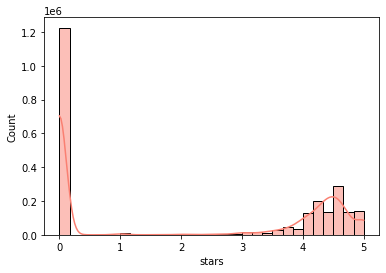

In [53]:

#4.    Visualizations:
     #   Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(amazon_prd_df['stars'], kde=True, bins=30, color="salmon")

In [ ]:
#The most common rating is 0, but we can see on the other side that when the user rates the common rating moves between 4 and 5, with 5 being the highest rating.